#### import required libraries

In [55]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


#### load csv into memory

In [4]:
data = pandas.read_csv('uber-raw-data-jul14.csv')

#### using map to apply a function to a set of data 
#### pandas.to_datetime converts string to python datetime

In [9]:
data.tail()

,Date/Time,Lat,Lon,Base
796116,7/31/2014 23:22:00,40.7285,-73.9846,B02764
796117,7/31/2014 23:23:00,40.7615,-73.9868,B02764
796118,7/31/2014 23:29:00,40.6770,-73.9515,B02764
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764
796120,7/31/2014 23:58:00,40.7199,-73.9884,B02764


In [19]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [22]:
data.tail()

,Date/Time,Lat,Lon,Base
796116,2014-07-31 23:22:00,40.7285,-73.9846,B02764
796117,2014-07-31 23:23:00,40.7615,-73.9868,B02764
796118,2014-07-31 23:29:00,40.6770,-73.9515,B02764
796119,2014-07-31 23:30:00,40.7225,-74.0038,B02764
796120,2014-07-31 23:58:00,40.7199,-73.9884,B02764


In [25]:
data['Date/Time'][0]

Timestamp('2014-07-01 00:03:00')

In [26]:
def get_dayofmonth(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dayofmonth)

In [31]:
def get_weekday(dt):
    return dt.dayofweek
data['dow'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)


In [32]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,dow,hour
796116,2014-07-31 23:22:00,40.7285,-73.9846,B02764,31,3,23
796117,2014-07-31 23:23:00,40.7615,-73.9868,B02764,31,3,23
796118,2014-07-31 23:29:00,40.6770,-73.9515,B02764,31,3,23
796119,2014-07-31 23:30:00,40.7225,-74.0038,B02764,31,3,23
796120,2014-07-31 23:58:00,40.7199,-73.9884,B02764,31,3,23


## some analysis

### playing around with date of month

#### no of uber rides vs. day of month  

##### with hist from matplotlib

Text(0.5,1,'Frequency by DoM - uber - Jul 2014')

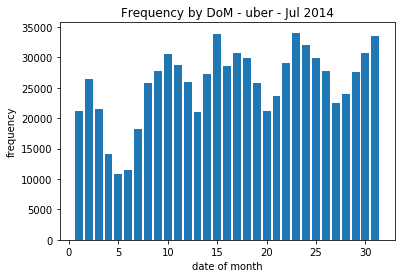

In [72]:
hist(data.dom, bins=31, rwidth=.8, range=(0.5,31.5))
xlabel('date of month')
ylabel('frequency')
title('Frequency by DoM - uber - Jul 2014')

##### 2nd method

In [79]:
for dayOfMonth, rides in data.groupby('dom'):
    print(dayOfMonth,len(rides))

(1, 21228)
(2, 26480)
(3, 21597)
(4, 14148)
(5, 10890)
(6, 11443)
(7, 18280)
(8, 25763)
(9, 27817)
(10, 30541)
(11, 28752)
(12, 25936)
(13, 21082)
(14, 27350)
(15, 33845)
(16, 28607)
(17, 30710)
(18, 29860)
(19, 25726)
(20, 21212)
(21, 23578)
(22, 29029)
(23, 34073)
(24, 32050)
(25, 29975)
(26, 27708)
(27, 22590)
(28, 23981)
(29, 27589)
(30, 30740)
(31, 33541)


##### 3rd Method (with more flexibility)

In [83]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     21228
2     26480
3     21597
4     14148
5     10890
6     11443
7     18280
8     25763
9     27817
10    30541
11    28752
12    25936
13    21082
14    27350
15    33845
16    28607
17    30710
18    29860
19    25726
20    21212
21    23578
22    29029
23    34073
24    32050
25    29975
26    27708
27    22590
28    23981
29    27589
30    30740
31    33541
dtype: int64

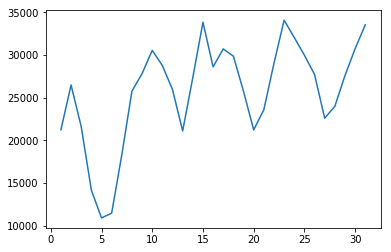

In [84]:
plot(by_date)

<BarContainer object of 31 artists>

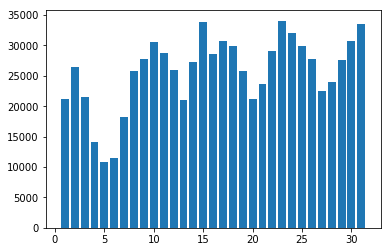

In [90]:
bar(range(1,32),by_date)

In [93]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
5     10890
6     11443
4     14148
7     18280
13    21082
20    21212
1     21228
3     21597
27    22590
21    23578
28    23981
19    25726
8     25763
12    25936
2     26480
14    27350
29    27589
26    27708
9     27817
16    28607
11    28752
22    29029
18    29860
25    29975
10    30541
17    30710
30    30740
24    32050
31    33541
15    33845
23    34073
dtype: int64

Text(0.5,1,'Frequency by DoM - uber - Jul 2014')

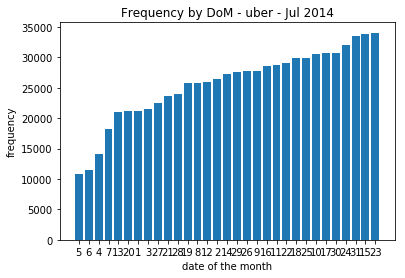

In [97]:
bar(range(1,32),by_date_sorted)
xticks(range(1,32), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Jul 2014')

### playing around with the hour

Text(0.5,1,'Frequency by Hour - uber - Jul 2014')

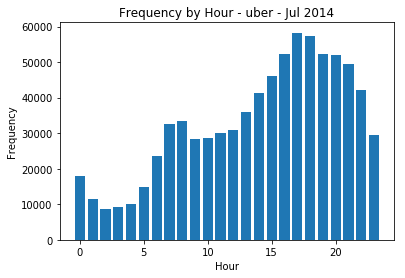

In [115]:
hist(data.hour,rwidth=0.8, bins = 24, range = (-0.5,23.5))
xlabel('Hour')
ylabel('Frequency')
title('Frequency by Hour - uber - Jul 2014')

In [107]:
by_hour = data.groupby('hour').apply(count_rows)
by_hour

hour
0     17953
1     11527
2      8562
3      9199
4     10040
5     14932
6     23456
7     32545
8     33387
9     28486
10    28558
11    30120
12    30900
13    35832
14    41357
15    46053
16    52403
17    58260
18    57268
19    52332
20    51859
21    49528
22    42218
23    29346
dtype: int64

#### flexible method

<BarContainer object of 24 artists>

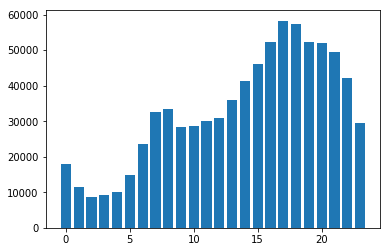

In [118]:
bar(by_hour.index,by_hour)

In [125]:
by_hour_sorted = by_hour.sort_values()
by_hour_sorted

hour
2      8562
3      9199
4     10040
1     11527
5     14932
0     17953
6     23456
9     28486
10    28558
23    29346
11    30120
12    30900
7     32545
8     33387
13    35832
14    41357
22    42218
15    46053
21    49528
20    51859
19    52332
16    52403
18    57268
17    58260
dtype: int64

([<matplotlib.axis.XTick at 0x7f1cc83aa410>,
 <a list of 24 Text xticklabel objects>)

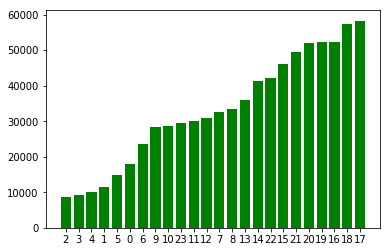

In [135]:
bar(range(0,24),by_hour_sorted, color='green')
xticks(range(0,24),by_hour_sorted.index)

### playing aroud with the weekday

([<matplotlib.axis.XTick at 0x7f1cc48d87d0>,
 <a list of 7 Text xticklabel objects>)

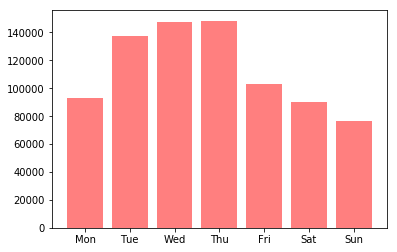

In [157]:
hist(data.dow, rwidth=0.8, range=(-0.5,6.5), bins=7, color='red',alpha=0.5)
xticks(range(0,7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

### cross analysis with hour and weekday

In [163]:
data.groupby('hour dow'.split()).apply(count_rows)

hour  dow
0     0       1260
      1       1509
      2       1773
      3       2150
      4       2460
      5       4441
      6       4360
1     0        613
      1        779
      2        966
      3       1157
      4       1541
      5       3153
      6       3318
2     0        439
      1        556
      2        780
      3        855
      4       1059
      5       2320
      6       2553
3     0       1019
      1        935
      2       1120
      3       1283
      4       1230
      5       1704
      6       1908
4     0       1615
      1       1483
             ...  
19    5       4913
      6       3700
20    0       6303
      1       9781
      2      10491
      3      10177
      4       5699
      5       5396
      6       4012
21    0       5640
      1       8297
      2       9751
      3       9545
      4       6654
      5       5901
      6       3740
22    0       3828
      1       5806
      2       7275
      3       8578
      4       7103
  

In [169]:
by_cross = data.groupby('dow hour'.split()).apply(count_rows).unstack()
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,
0,1260,613,439,1019,1615,2461,3644,5066,4797,3692,...,4604,5057,6283,7328,6551,6378,6303,5640,3828,2266
1,1509,779,556,935,1483,2730,4811,6750,6662,5061,...,7551,7951,9219,11712,10992,9983,9781,8297,5806,3323
2,1773,966,780,1120,1630,2799,5017,7129,7125,5419,...,7229,8719,10421,11669,11739,10563,10491,9751,7275,4126
3,2150,1157,855,1283,1884,2931,4796,6709,6683,5385,...,7443,8654,9691,10485,11203,10848,10177,9545,8578,5756
4,2460,1541,1059,1230,1359,1989,2947,4032,4152,3631,...,5457,6031,6440,6657,6682,5947,5699,6654,7103,6077
5,4441,3153,2320,1704,1087,1097,1214,1594,2101,2668,...,4491,5079,5482,5483,5838,4913,5396,5901,6337,5600
6,4360,3318,2553,1908,982,925,1027,1265,1867,2630,...,4582,4562,4867,4926,4263,3700,4012,3740,3291,2198


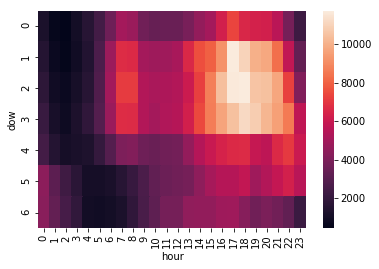

In [172]:
seaborn.heatmap(by_cross)

## playing around with coordinates

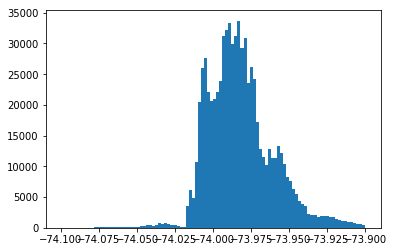

In [189]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9));


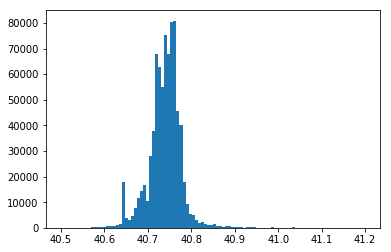

In [190]:
hist(data['Lat'],bins=100, range=(40.5,41.2));

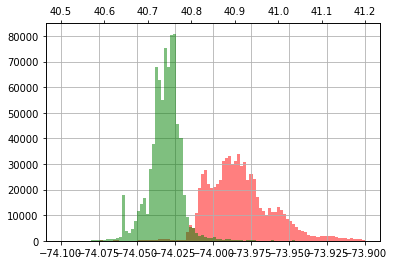

In [199]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9),color='r',alpha=0.5,label='longitude')
grid()
legend
twiny()
hist(data['Lat'],bins=100, range=(40.5,41.2),color='g',alpha=0.5,label='latitude');